Reference: https://github.com/saeyslab/nichenetr/blob/master/vignettes/seurat_wrapper.md

In [1]:
%config InlineBackend.figure_format = 'retina'

from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib as mpl
import matplotlib.patches as mp
import seaborn as sns
    
plt.rcParams["font.family"] = "Arial"
plt.rcParams['svg.fonttype'] = 'none'

In [2]:
import scanpy as sc
import decoupler as dc
import pandas as pd
import numpy as np
from loguru import logger

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import sys
sys.path.append('/home/mowp/workspace/mowp_scripts/tools')

import os
os.environ['R_HOME'] = '/home/mowp/mambaforge/envs/sc/lib/R'

import sctk

In [3]:
%load_ext rpy2.ipython

import rpy2.robjects as ro
from rpy2.robjects.packages import importr
R = ro.r
rEnv = ro.globalenv

In [4]:
from sctk.utils import rtools

# Adata object

In [27]:
infile = '/data/user/mowp/workspace/single_cell_analysis/single-cell-best-practics/dataset/kang_counts_25k.h5ad'
adata = sc.read_h5ad(infile)
adata

AnnData object with n_obs × n_vars = 24673 × 15706
    obs: 'nCount_RNA', 'nFeature_RNA', 'tsne1', 'tsne2', 'label', 'cluster', 'cell_type', 'replicate', 'nCount_SCT', 'nFeature_SCT', 'integrated_snn_res.0.4', 'seurat_clusters'
    var: 'name'
    obsm: 'X_pca', 'X_umap'

In [28]:
sctk.pp.layer_pp(adata)

2024-12-10 15:00:03.804 | INFO     | sctk.pp.adata_process:layer_pp:87 - Save X to adat.layers["counts"]
2024-12-10 15:00:03.806 | INFO     | sctk.pp.adata_process:layer_pp:91 - Preprocessing layer: counts, normalize total: 10000.0, logbase: 10


In [29]:
adata.obs = adata.obs.rename({"label": "condition", "replicate": "patient"}, axis=1)

In [30]:
rEnv['seuratObj'] = rtools.ad2so(adata, layer='counts')
cell_type_key = 'cell_type'
R(f"Idents(object = seuratObj) <- '{cell_type_key}'")
seuratObj = rEnv['seuratObj']

In [31]:
nichenet_output_r = sctk.tl.run_nichenet_soj(
    seuratObj,
    organism = 'human',
    sender_celltypes = ["CD4 T cells", "B cells", "FCGR3A+ Monocytes"],
    receiver_celltypes = ["CD8 T cells"],
    condition_colname = 'condition',
    condition_oi = 'stim',
    condition_reference = 'ctrl',
    expression_pct = 0.05,  # important parameter!!!
)

[1] "The RNA assay will be used for the analysis."
[1] "Read in and process NicheNet's networks"
[1] "Define expressed ligands and receptors in receiver and sender cells"
[1] "Perform DE analysis in receiver cell"
  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~03s           |++                                                | 2 % ~03s           |++                                                | 3 % ~03s           |+++                                               | 4 % ~03s           |+++                                               | 5 % ~03s           |++++                                              | 6 % ~03s           |++++                                              | 7 % ~03s           |+++++                                             | 9 % ~03s           |+++++                                             | 10% ~03s           |++++++                                            | 11% ~03s   

R[write to console]: Warning:
R[write to console]:  Scaling data with a low number of groups may produce misleading results



In [32]:
nichenet_output = rtools.r2py(nichenet_output_r)

In [33]:
nichenet_output.keys()

('ligand_activities',
 'top_ligands',
 'top_targets',
 'top_receptors',
 'ligand_target_matrix',
 'ligand_target_heatmap',
 'ligand_target_df',
 'ligand_expression_dotplot',
 'ligand_differential_expression_heatmap',
 'ligand_activity_target_heatmap',
 'ligand_receptor_matrix',
 'ligand_receptor_heatmap',
 'ligand_receptor_df',
 'geneset_oi',
 'background_expressed_genes')

In [34]:
nichenet_output['geneset_oi']

array(['ISG15', 'IFI6', 'ISG20', 'IFIT1', 'IFIT3', 'MX1', 'LY6E', 'OAS1',
       'B2M', 'MT2A', 'LAG3', 'PLSCR1', 'IFIT2', 'IRF7', 'RSAD2',
       'EPSTI1', 'HERC5', 'BST2', 'UBE2L6', 'SAT1', 'SAMD9L', 'PRF1',
       'IFI44L', 'IFI35', 'MYL12A', 'TMSB10', 'MX2', 'OASL', 'EIF2AK2',
       'DRAP1', 'TRIM22', 'CMPK2', 'PSMB9', 'IFI44', 'DYNLT1', 'IFI16',
       'DDX58', 'TNFSF10', 'GBP1', 'TYMP', 'PSME2', 'XAF1', 'IFITM2',
       'RTP4', 'STAT1', 'PPM1K', 'LAP3', 'RNF213', 'CXCL10', 'PARP9',
       'SP110', 'OAS3', 'HLA-B', 'TREX1', 'NT5C3A', 'RPL3', 'OAS2',
       'IFIH1', 'RPL7', 'CARD16', 'PARP14', 'RBCK1', 'NMI', 'NUB1',
       'ANXA1', 'HLA-C', 'CD38', 'CASP1', 'SP100', 'SOCS1', 'IFITM1',
       'HELZ2', 'CD48', 'DNAJA1', 'PSMB8', 'GAPDH', 'IFITM3', 'CLEC2D',
       'RPL10', 'TMEM123', 'CD69', 'HLA-E', 'PHF11', 'TAP1', 'HLA-A',
       'CHMP5', 'PNPT1', 'RPL6', 'CYBA', 'SPATS2L', 'RPL15', 'CCL8',
       'GNLY', 'ODF2L', 'CD164', 'DDX60L', 'RPS2', 'RPL13A', 'RPS6',
       'GBP4', 'CHST

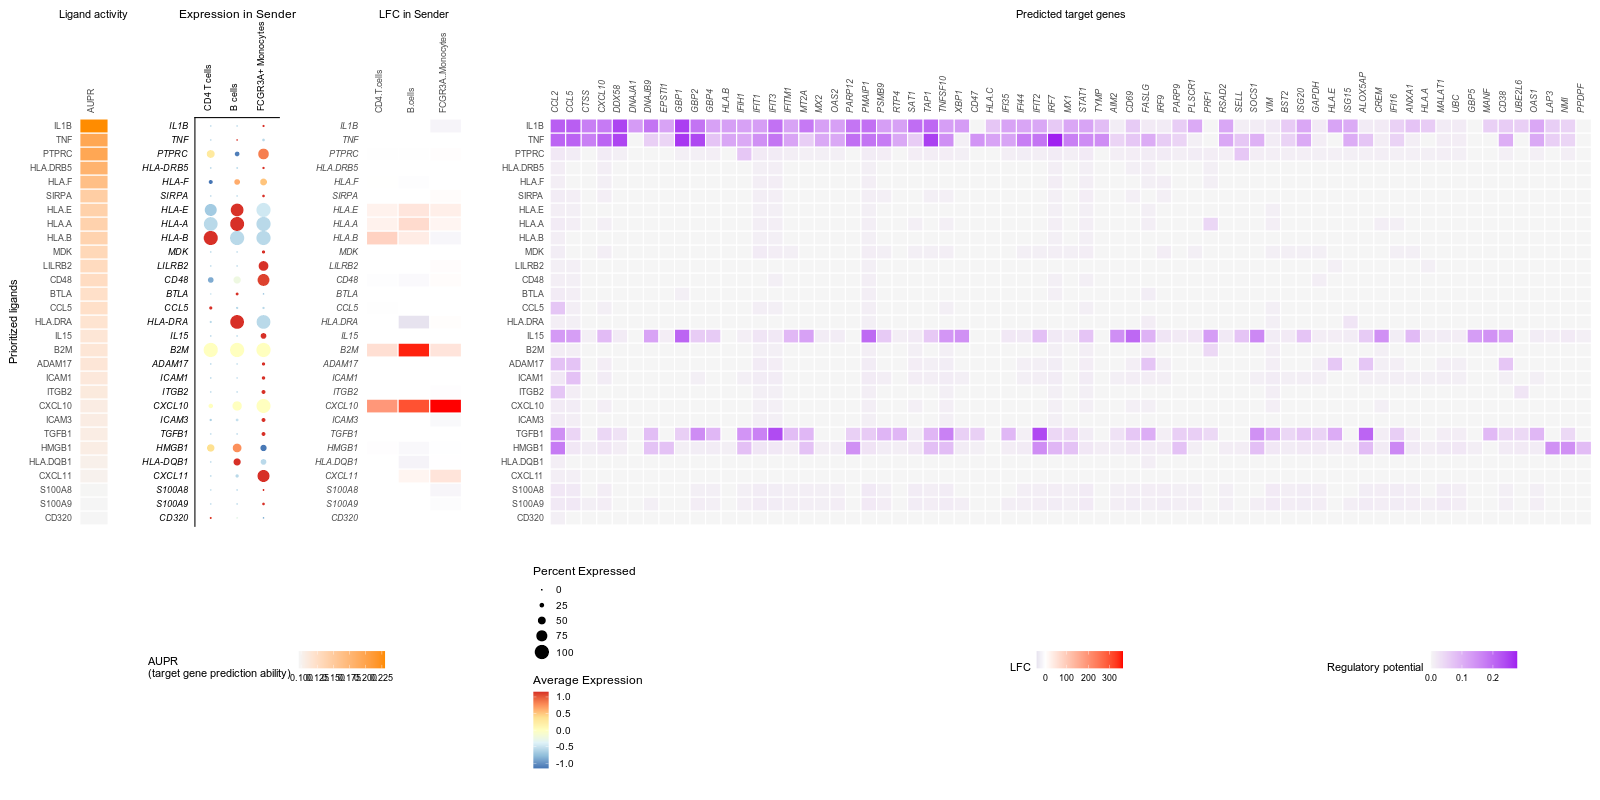

In [35]:
%%R -w 1600 -h 800 -i nichenet_output_r

nichenet_output_r$ligand_activity_target_heatmap

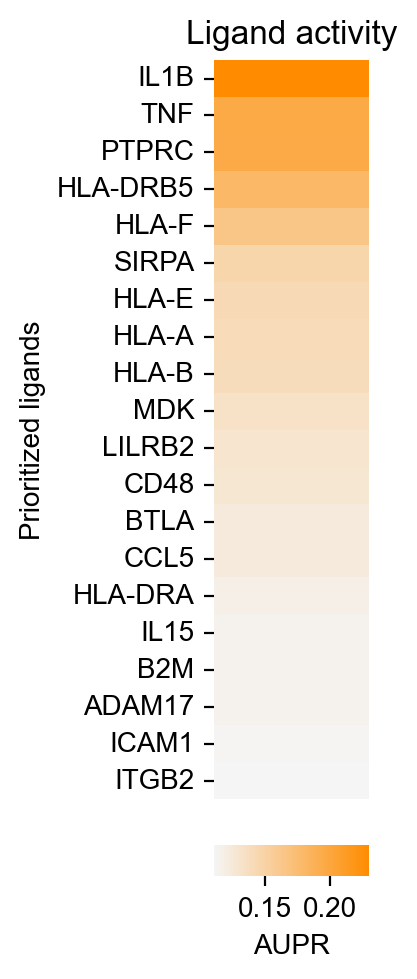

In [26]:
plt.figure(figsize=(1, 6))

ligand_activities = nichenet_output['ligand_activities']
ax = sns.heatmap(
    ligand_activities.set_index('test_ligand')[['aupr_corrected']].head(20), 
    cmap=sctk.pl.ColorMaps('whitesmoke', 'darkorange').cmap, 
    cbar_kws={
        'label': 'AUPR', 
        'orientation': 'horizontal',
        'pad': .05,
        'aspect': 5})

ax.set_xticks([])
ax.set_title('Ligand activity')
ax.set_ylabel('Prioritized ligands')

plt.show()

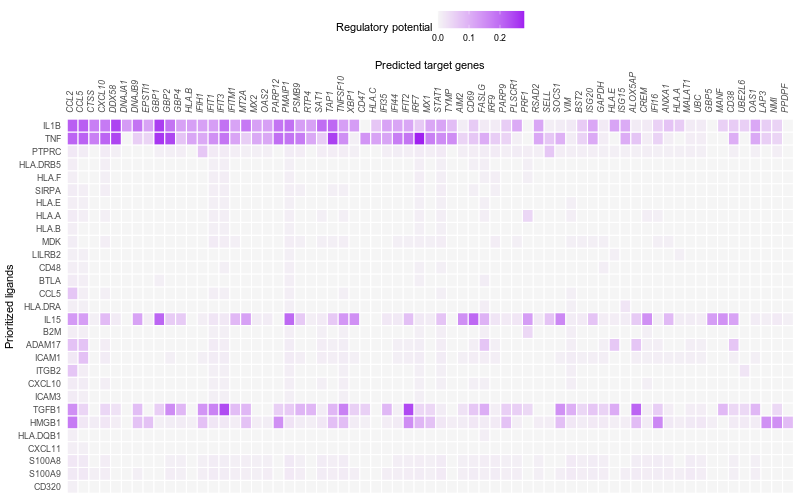

In [38]:
%%R -w 800 -h 500 

nichenet_output_r$ligand_target_heatmap

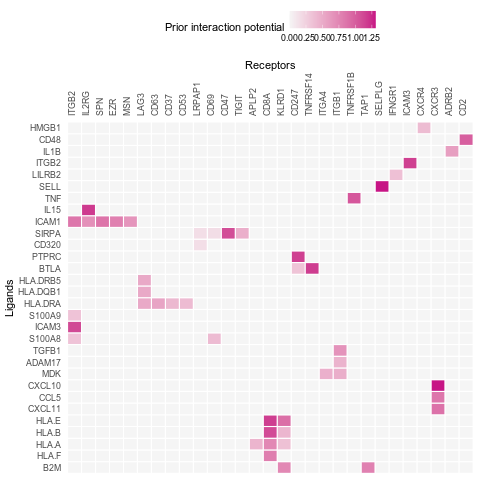

In [39]:
%%R

nichenet_output_r$ligand_receptor_heatmap

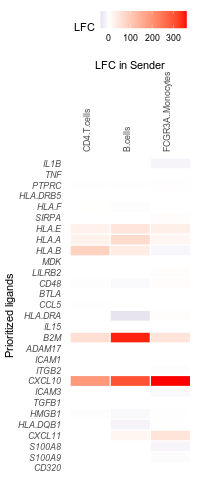

In [40]:
%%R -w 200

nichenet_output_r$ligand_differential_expression_heatmap

In [41]:
nichenet_output['top_targets']

array(['CCL2', 'CCL5', 'CTSS', 'CXCL10', 'DDX58', 'DNAJA1', 'DNAJB9',
       'EPSTI1', 'GBP1', 'GBP2', 'GBP4', 'HLA-B', 'IFIH1', 'IFIT1',
       'IFIT3', 'IFITM1', 'MT2A', 'MX2', 'OAS2', 'PARP12', 'PMAIP1',
       'PSMB9', 'RTP4', 'SAT1', 'TAP1', 'TNFSF10', 'XBP1', 'CD47',
       'HLA-C', 'IFI35', 'IFI44', 'IFIT2', 'IRF7', 'MX1', 'STAT1', 'TYMP',
       'AIM2', 'CD69', 'FASLG', 'IRF9', 'PARP9', 'PLSCR1', 'PRF1',
       'RSAD2', 'SELL', 'SOCS1', 'VIM', 'BST2', 'ISG20', 'GAPDH', 'HLA-E',
       'ISG15', 'ALOX5AP', 'CREM', 'IFI16', 'ANXA1', 'HLA-A', 'MALAT1',
       'UBC', 'GBP5', 'MANF', 'CD38', 'UBE2L6', 'OAS1', 'LAP3', 'NMI',
       'PPDPF'], dtype='<U7')

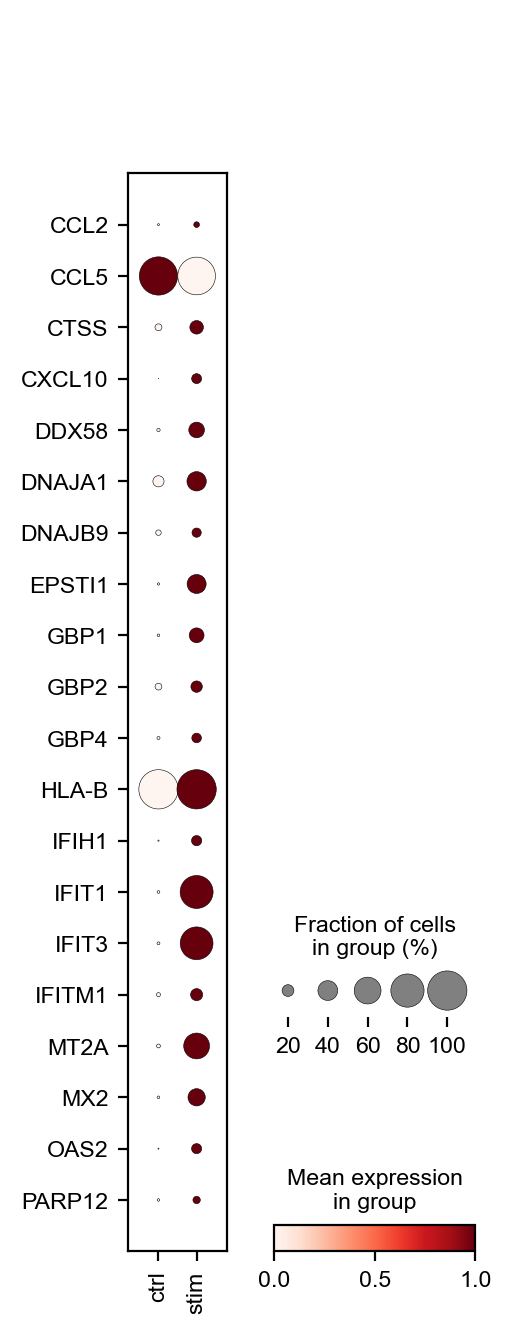

In [44]:
sc.pl.dotplot(
    adata[adata.obs['cell_type'].isin(['CD8 T cells'])],
    var_names=nichenet_output['top_targets'][:20],
    groupby='condition',
    standard_scale='var',
    cmap='Reds',
    swap_axes=True,
    # dendrogram=True,
)

# Seurat Object

In [6]:
%%R -o seuratObj

library(Seurat)
library(SeuratObject)
library(nichenetr)

seuratObj <- readRDS('/data/user/mowp/db/nichenet/seuratObj.rds')

seuratObj <- UpdateSeuratObject(seuratObj)
seuratObj <- alias_to_symbol_seurat(seuratObj, "mouse")


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

Attaching SeuratObject
Attaching sp
Validating object structure
Updating object slots
Ensuring keys are in the proper strucutre
Ensuring feature names don't have underscores or pipes
Updating slots in RNA
Updating slots in cca
Updating slots in cca.aligned
Updating slots in tsne
Setting tsne DimReduc to global
Updating slots in pca
Object representation is consistent with the most current Seurat version


In [19]:
import importlib

importlib.reload(sctk.tl._nichenetr)
importlib.reload(sctk.tl)
importlib.reload(sctk)

<module 'sctk' from '/home/mowp/workspace/mowp_scripts/tools/sctk/__init__.py'>

In [ ]:
nichenet_output_r = sctk.tl.run_nichenet_soj(
    seuratObj,
    organism = 'mouse',
    sender_celltypes = ["CD4 T", "Treg", "Mono", "NK", "B", "DC"],
    receiver_celltypes = 'CD8 T',
    condition_colname = 'aggregate',
    condition_oi = 'LCMV',
    condition_reference = 'SS',
    expression_pct = .05,
)

/home/mowp/workspace/mowp_scripts/tools/sctk/tl/_nichenetr.py
[1] "The RNA assay will be used for the analysis."
[1] "Read in and process NicheNet's networks"
[1] "Define expressed ligands and receptors in receiver and sender cells"
[1] "Perform DE analysis in receiver cell"
  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~05s           |++                                                | 2 % ~05s           |++                                                | 3 % ~05s           |+++                                               | 4 % ~04s           |+++                                               | 5 % ~04s           |++++                                              | 6 % ~04s           |++++                                              | 7 % ~04s           |+++++                                             | 9 % ~04s           |+++++                                             | 10% ~04s           |+

In [43]:
nichenet_output = rtools.r2py(nichenet_output_r)

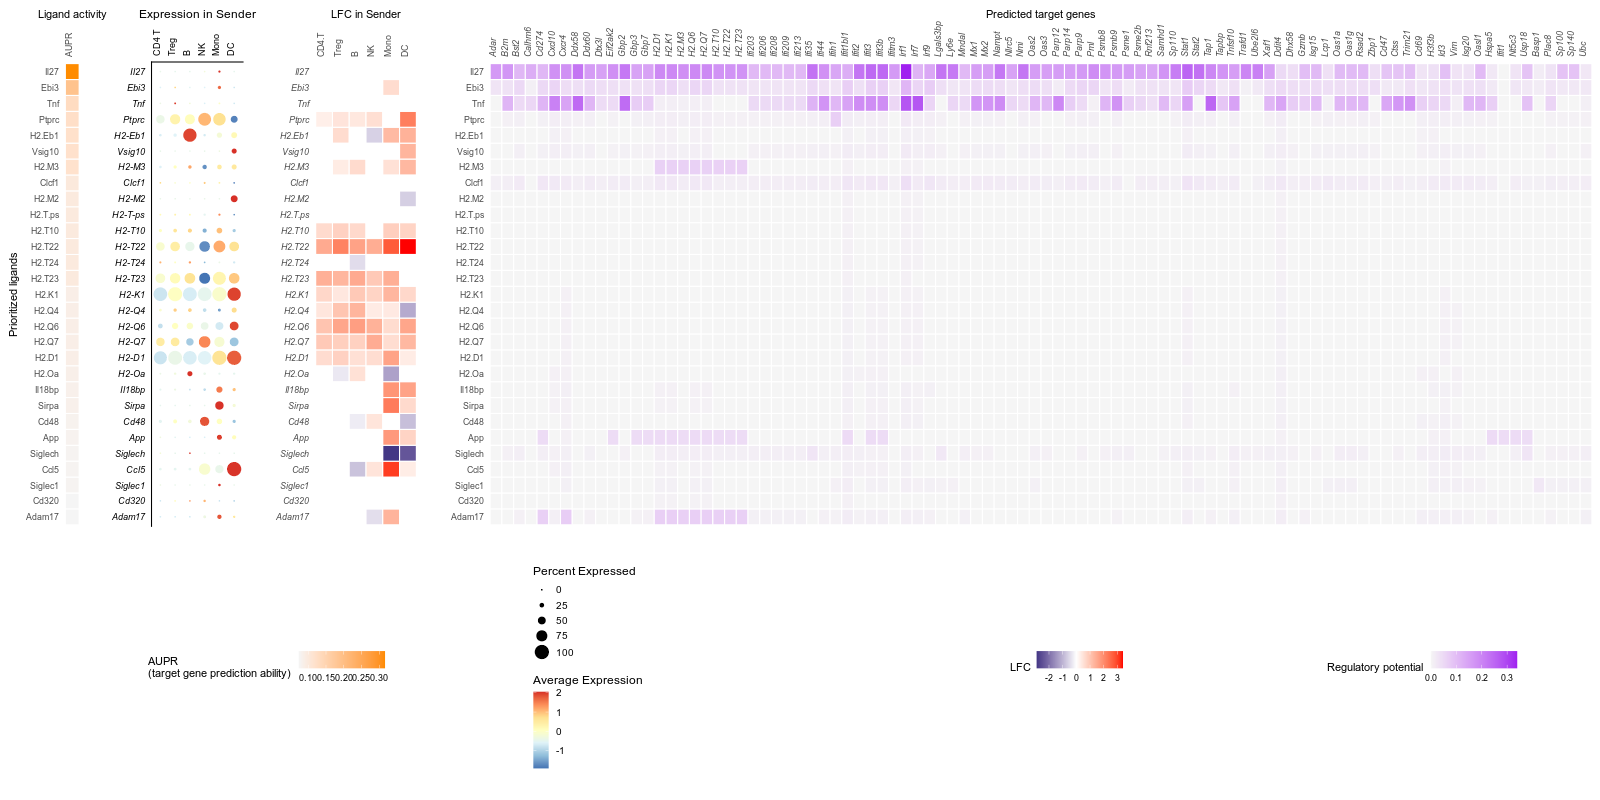

In [22]:
%%R -w 1600 -h 800 -i nichenet_output_r

nichenet_output_r$ligand_activity_target_heatmap

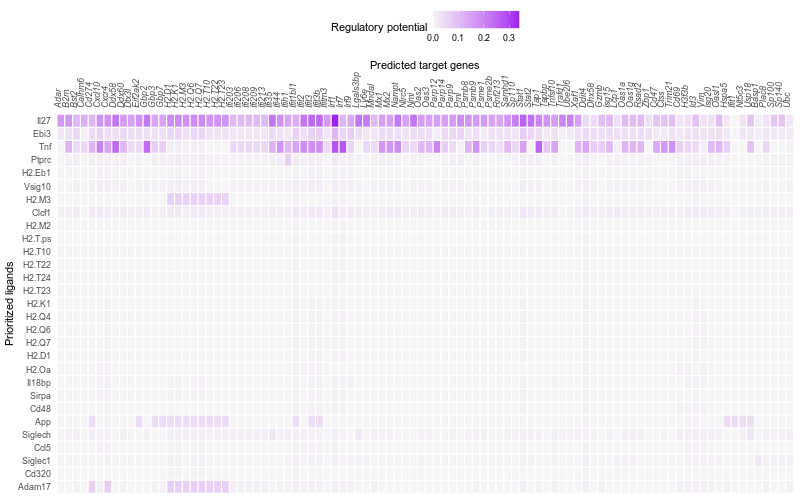

In [12]:
%%R -w 800 -h 500 

nichenet_output_r$ligand_target_heatmap

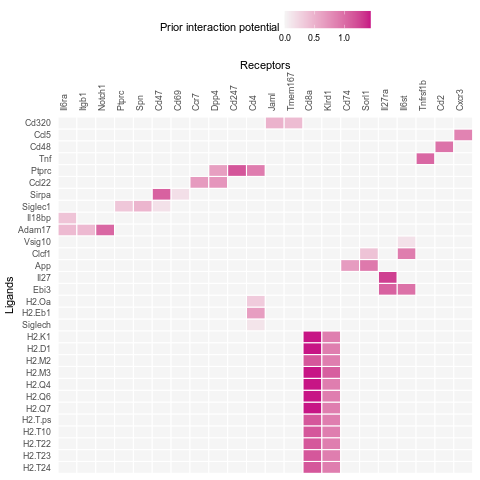

In [13]:
%%R

nichenet_output_r$ligand_receptor_heatmap

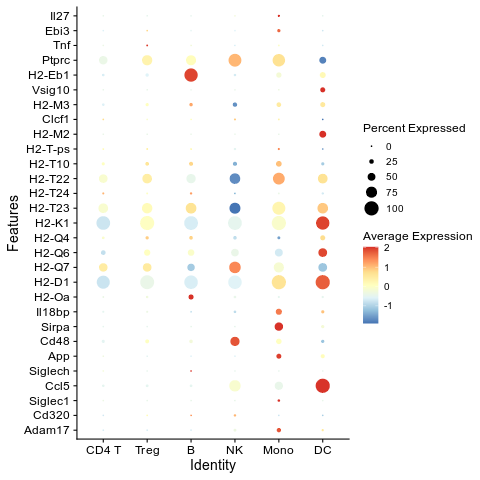

In [23]:
%%R

nichenet_output_r$ligand_expression_dotplot

# Gene set of interest

In [33]:
import importlib

importlib.reload(sctk.tl._nichenetr)
importlib.reload(sctk.tl)
importlib.reload(sctk)

<module 'sctk' from '/home/mowp/workspace/mowp_scripts/tools/sctk/__init__.py'>

In [5]:
importr('nichenetr')
importr('tidyverse')


    an issue that caused a segfault when used with rpy2:
    https://github.com/rstudio/reticulate/pull/1188
    Make sure that you use a version of that package that includes
    the fix.
    

rpy2.robjects.packages.Package as a <module 'tidyverse'>

In [7]:
lr_network, ligand_target_matrix, weighted_networks = sctk.tl._load_prior_knowledge('human', return_env=True)

In [8]:
%%R -i lr_network

lr_network <- lr_network %>% distinct(from, to)

In [9]:
%%R

hnscc_expression <- readRDS('/data/user/mowp/db/nichenet/demo_data/hnscc_expression.rds')
expression <- hnscc_expression$expression
sample_info <- hnscc_expression$sample_info # contains meta-information about the cells
colnames(expression) <- convert_alias_to_symbols(colnames(expression), "human", verbose = FALSE)

In [10]:
%%R

tumors_remove <- c("HN10","HN","HN12", "HN13", "HN24", "HN7", "HN8","HN23")

CAF_ids <- sample_info %>%
  filter(`Lymph node` == 0 & !(tumor %in% tumors_remove) &
           `non-cancer cell type` == "CAF") %>% pull(cell)
malignant_ids <- sample_info %>% filter(`Lymph node` == 0 &
                                          !(tumor %in% tumors_remove) &
                                          `classified  as cancer cell` == 1) %>% pull(cell)

expressed_genes_sender <- expression[CAF_ids,] %>%
  apply(2,function(x){10*(2**x - 1)}) %>%
  apply(2,function(x){log2(mean(x) + 1)}) %>% .[. >= 4] %>% 
  names()

expressed_genes_receiver <- expression[malignant_ids,] %>%
  apply(2,function(x){10*(2**x - 1)}) %>%
  apply(2,function(x){log2(mean(x) + 1)}) %>% .[. >= 4] %>%
  names()

In [11]:
%%R -o potential_ligands -i ligand_target_matrix

ligands <- lr_network %>% pull(from) %>% unique()
expressed_ligands <- intersect(ligands,expressed_genes_sender)

receptors <- lr_network %>% pull(to) %>% unique()
expressed_receptors <- intersect(receptors,expressed_genes_receiver)

potential_ligands <-  lr_network %>% filter(from %in% expressed_ligands & to %in% expressed_receptors) %>% 
  pull(from) %>% unique()

potential_ligands <- intersect(potential_ligands, colnames(ligand_target_matrix))

In [12]:
%%R

length(potential_ligands)

[1] 212


In [13]:
infile = '/data/user/mowp/db/nichenet/demo_data/pemt_signature.txt'
with open(infile, 'r') as f:
    pemt_signature = f.read().split()

In [14]:
%%R -i pemt_signature -i ligand_target_matrix -o geneset_oi

geneset_oi <- intersect(pemt_signature, rownames(ligand_target_matrix))

In [15]:
# Define the gene set of interest
geneset_oi

array(['SERPINE1', 'TGFBI', 'MMP10', 'LAMC2', 'P4HA2', 'PDPN', 'ITGA5',
       'LAMA3', 'CDH13', 'TNC', 'MMP2', 'EMP3', 'INHBA', 'LAMB3', 'VIM',
       'SEMA3C', 'ANXA5', 'DHRS7', 'ITGB1', 'ACTN1', 'ITGB6', 'IGFBP7',
       'THBS1', 'PTHLH', 'TNFRSF6B', 'PDLIM7', 'CAV1', 'DKK3', 'COL17A1',
       'LTBP1', 'COL5A2', 'COL1A1', 'FHL2', 'TIMP3', 'PLAU', 'LGALS1',
       'PSMD2', 'CD63', 'HERPUD1', 'TPM1', 'SLC39A14', 'C1S', 'MMP1',
       'EXT2', 'COL4A2', 'PRSS23', 'SLC7A8', 'SLC31A2', 'ARPC1B', 'APP',
       'MFAP2', 'MPZL1', 'MT2A', 'MAGED2', 'ITGA6', 'FSTL1', 'TNFRSF12A',
       'IL32', 'COPB2', 'PTK7', 'OCIAD2', 'TAX1BP3', 'SEC13', 'SERPINH1',
       'TPM4', 'MYH9', 'ANXA8L1', 'PLOD2', 'GALNT2', 'MAGED1', 'SLC38A5',
       'FSTL3', 'CD99', 'F3', 'PSAP', 'NMRK1', 'FKBP9', 'DSG2', 'ECM1',
       'HTRA1', 'SERINC1', 'CALU', 'TPST1', 'PLOD3', 'IGFBP3', 'FRMD6',
       'CXCL14', 'SERPINE2', 'RABAC1', 'TMED9', 'NAGK', 'BMP1', 'ESYT1',
       'STON2', 'TAGLN', 'GJA1'], dtype='<U9')

In [16]:
%%R -o background_expressed_genes

background_expressed_genes <- expressed_genes_receiver %>% .[. %in% rownames(ligand_target_matrix)]

In [17]:
# Define background genes
background_expressed_genes

array(['RPS11', 'ELMO2', 'PNMA1', ..., 'SNRPD2', 'SLC39A6', 'CTSC'],
      dtype='<U13')

In [19]:
ligand_activities, vis_results = sctk.tl.predict_ligand_activities(
    geneset_oi = geneset_oi,
    background_expressed_genes = background_expressed_genes,
    potential_ligands = potential_ligands,
    organism = 'human',
)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


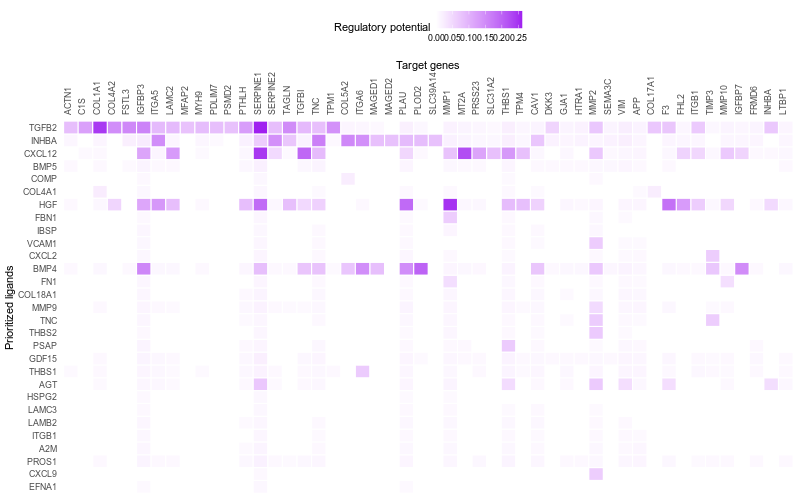

In [37]:
%%R -w 800 -h 500 -i vis_results

vis_results$ligand_target_network

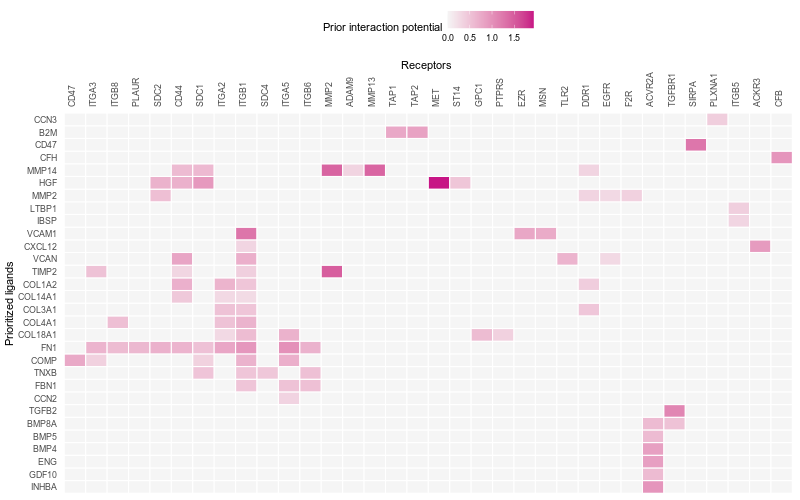

In [20]:
%%R -w 800 -h 500 -i vis_results

vis_results$ligand_receptor_network

In [22]:
ligand_activities = rtools.r2py(ligand_activities)

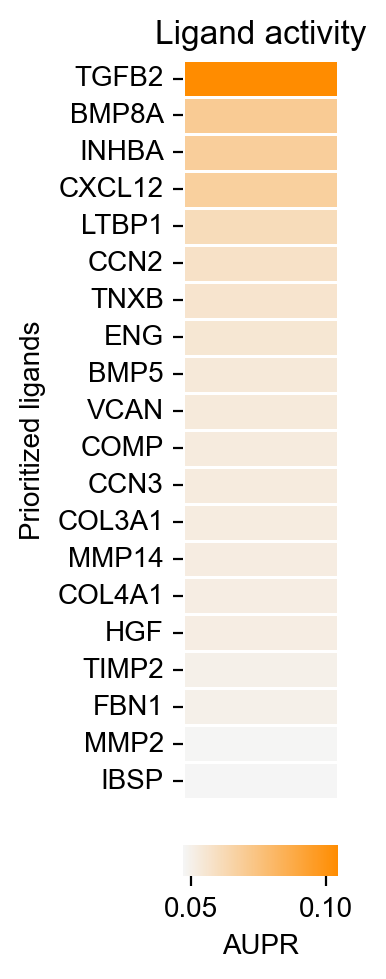

In [26]:
plt.figure(figsize=(1, 6))

ax = sns.heatmap(
    ligand_activities.set_index('test_ligand')[['aupr_corrected']].head(20), 
    cmap=sctk.pl.ColorMaps('whitesmoke', 'darkorange').cmap,
    linecolor='w',
    linewidth=1,
    cbar_kws={
        'label': 'AUPR', 
        'orientation': 'horizontal',
        'pad': .05,
        'aspect': 5})

ax.set_xticks([])
ax.set_title('Ligand activity')
ax.set_ylabel('Prioritized ligands')

plt.show()